In [ ]:
# default_exp frac_diff

In [3]:
# export
import numpy as np
import pandas as pd


def get_weights_ffd(d, thres):
    w, k = [1.0], 1
    while True:
        w_ = -w[-1] / k * (d - k + 1)
        if abs(w_) < thres:
            break
        w.append(w_)
        k += 1
    return np.array(w[::-1]).reshape(-1, 1)


def frac_diff_ffd(series, d, thres=1e-5):
    # Constant with window (new solution)
    w = get_weights_ffd(d, thres)
    width, df = len(w) - 1, {}

    for name in series.columns:
        series_f, df_ = (
            series[[name]].fillna(method="ffill").dropna(),
            pd.Series(index=series.index),
        )
        for iloc1 in range(width, series_f.shape[0]):
            loc0, loc1 = series_f.index[iloc1 - width], series_f.index[iloc1]
            if not np.isfinite(series.loc[loc1, name]):
                continue  # exclude NAs
            df_[loc1] = np.dot(w.T, series_f.loc[loc0:loc1])[0, 0]
        df[name] = df_.copy(deep=True)
    df = pd.concat(df, axis=1)
    return df

In [1]:
from mlbt.load_data import load_contracts
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
contract_data = load_contracts('@ES', 'daily')


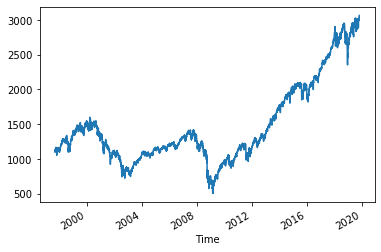

In [2]:
contract_data['Close'].plot()

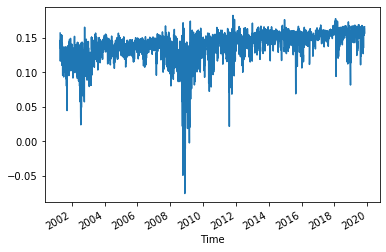

In [10]:
frac_diff_FFD(np.log(contract_data[['Close']]), 0.5)['Close'].plot()